# House Pricing dimensions reduction

In [35]:
# Install libs
!pip install -q pandas scikit-learn seaborn

In [36]:
# Load dataset
import pandas as pd

df = pd.read_csv("data/kc_house_data.csv")

In [37]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
features = df.drop(columns="price")

Standarize values for PCA

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
values = scaler.fit_transform(features)

## PCA

In [40]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca_values = pca.fit_transform(values)
expl_variance = pca.explained_variance_ratio_
cum_var = np.cumsum(expl_variance)  # Cumulated variance for all features

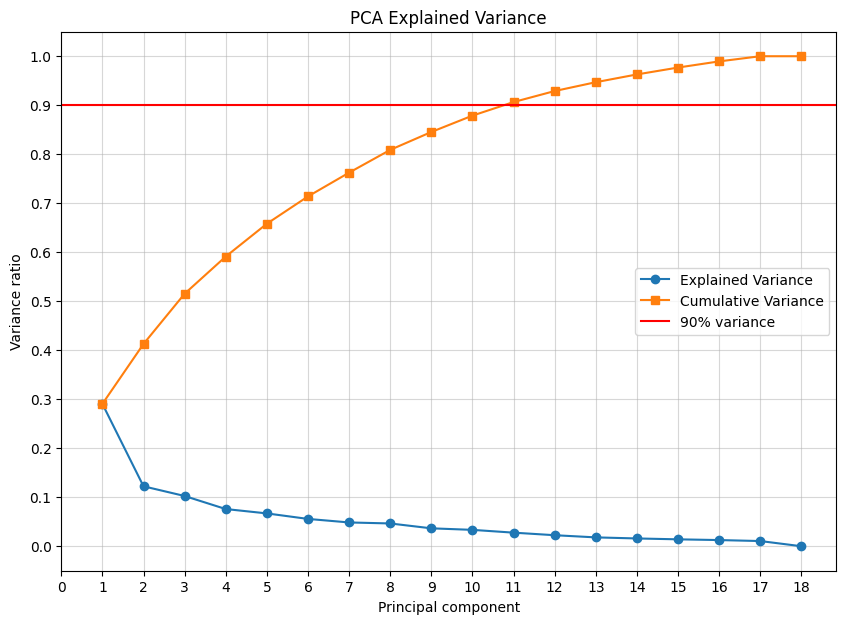

In [41]:
!pip install -q matplotlib
import matplotlib.pyplot as plt

components = range(1, len(expl_variance) + 1)
plt.figure(figsize=[10, 7])
plt.plot(components, expl_variance, marker="o", label="Explained Variance")
plt.plot(components, cum_var, marker="s", label="Cumulative Variance")

plt.title("PCA Explained Variance")
plt.xlabel("Principal component")
plt.ylabel("Variance ratio")

plt.xticks(np.arange(0, len(components) + 1))
plt.yticks(np.linspace(0, 1, 11))

plt.axhline(y=0.9, color="red", label="90% variance")
plt.grid(True, alpha=0.5)
plt.legend()

plt.show()

First 11 out of total 18 dimensions explain 90% variance

### Dimensions reduction

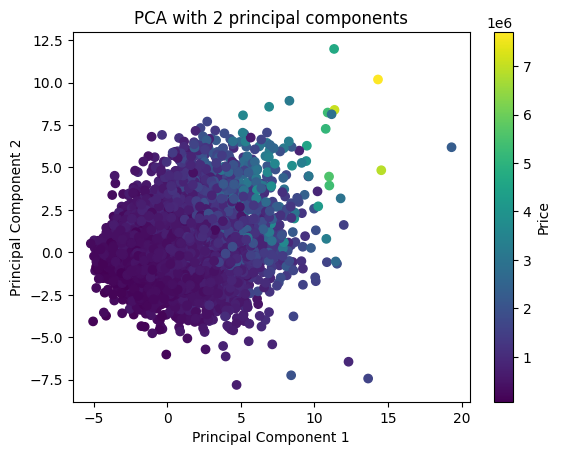

In [42]:
import pandas as pd

pca_2d = PCA(n_components=2)
features_2d = pca_2d.fit_transform(values)
pca2d_df = pd.DataFrame(
    features_2d, columns=["Principal Component 1", "Principal Component 2"]
)
pca2d_df["Price"] = df.price

scatter = plt.scatter(
    x=pca2d_df["Principal Component 1"],
    y=pca2d_df["Principal Component 2"],
    c=pca2d_df["Price"],
)
plt.title("PCA with 2 principal components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
cbar = plt.colorbar(scatter)
cbar.set_label("Price")

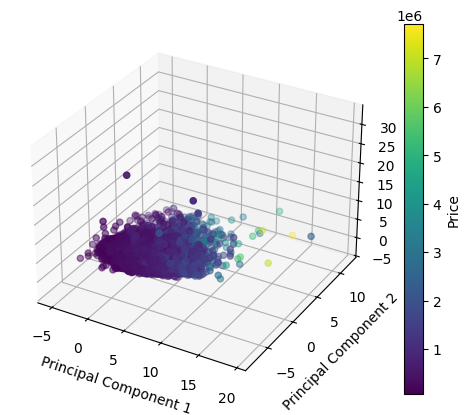

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=3)
features_2d = pca_2d.fit_transform(values)
pca2d_df = pd.DataFrame(
    features_2d,
    columns=["Principal Component 1", "Principal Component 2", "Principal Component 3"],
)
pca2d_df["Price"] = df.price


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    pca2d_df["Principal Component 1"],
    pca2d_df["Principal Component 2"],
    pca2d_df["Principal Component 3"],
    c=pca2d_df["Price"],
)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

cbar = plt.colorbar(scatter)
cbar.set_label("Price")

### PCA loadings

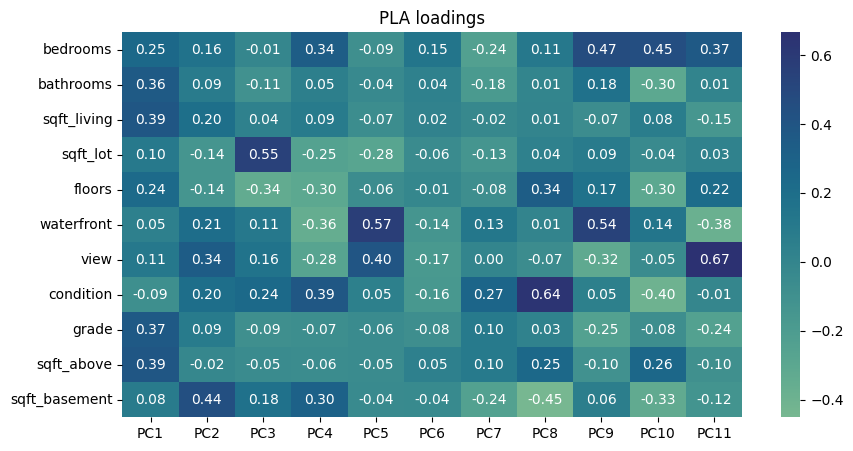

In [44]:
import seaborn as sns

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(features.columns))],
    index=features.columns,
)

plt.figure(figsize=[10, 5])
sns.heatmap(loadings.iloc[:11, :11], annot=True, center=0, fmt=".2f", cmap="crest")
plt.title("PLA loadings")

plt.show()

## t-SNE 

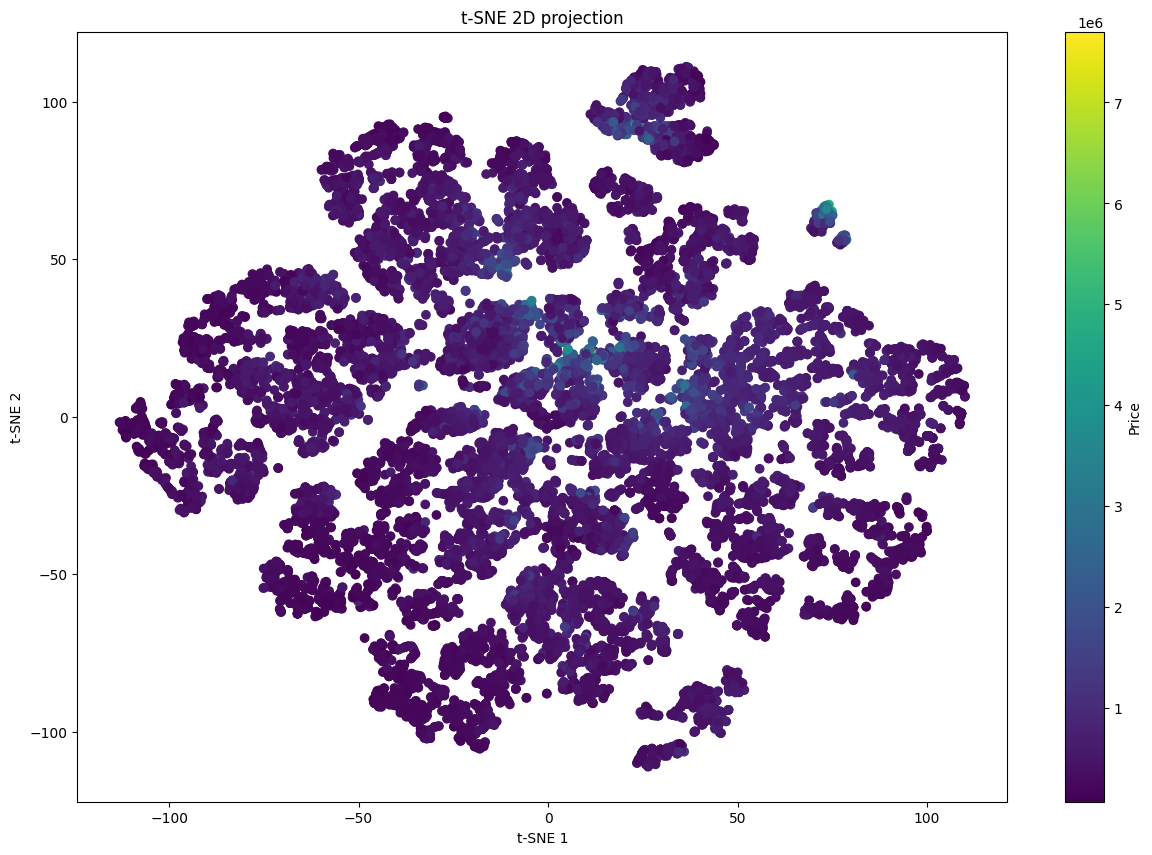

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
values_tsne = tsne.fit_transform(values)

tsne_df = pd.DataFrame(values_tsne, columns=["t-SNE 1", "t-SNE 2"])
tsne_df["Price"] = df.price

plt.figure(figsize=[15, 10])
scatter = plt.scatter(x=tsne_df["t-SNE 1"], y=tsne_df["t-SNE 2"], c=tsne_df["Price"])
plt.title("t-SNE 2D projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
cbar = plt.colorbar(scatter)
cbar.set_label("Price")

t-SNE shows clear group separation, however the impact of the group on the price is not so clear. Lets remove some outliers and check again - maybe the colour is missleading.

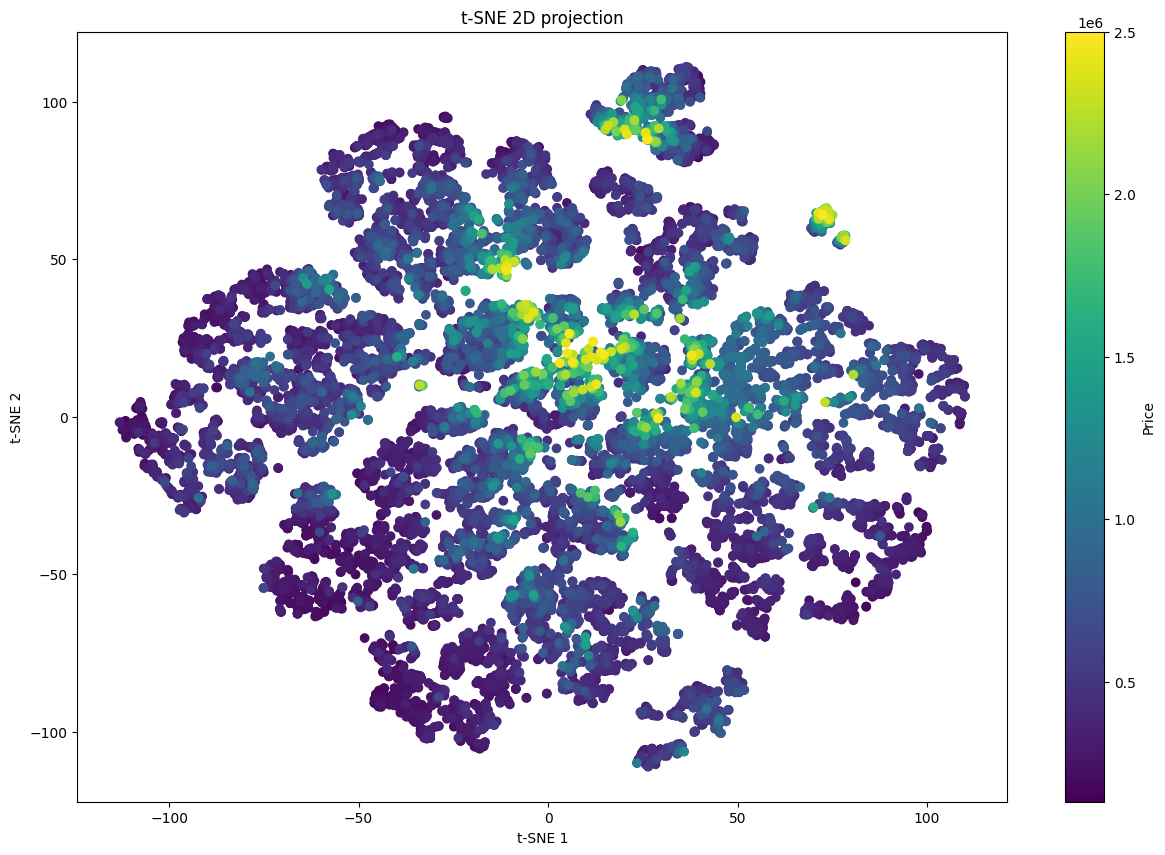

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
values_tsne = tsne.fit_transform(values)

tsne_df = pd.DataFrame(values_tsne, columns=["t-SNE 1", "t-SNE 2"])
tsne_df["price"] = df.price

tsne_df = tsne_df.sort_values(by="price")
tsne_df = pd.DataFrame(tsne_df.iloc[100 : len(tsne_df) - 100])

plt.figure(figsize=[15, 10])
scatter = plt.scatter(x=tsne_df["t-SNE 1"], y=tsne_df["t-SNE 2"], c=tsne_df["price"])
plt.title("t-SNE 2D projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
cbar = plt.colorbar(scatter)
cbar.set_label("Price")

Now the corellation between groups and the price is much more visible